In [1]:
from numpy import *

def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

dataMat, labelMat = loadDataSet()
print(dataMat[0:5])
print(labelMat[0:5])

[[1.0, -0.017612, 14.053064], [1.0, -1.395634, 4.662541], [1.0, -0.752157, 6.53862], [1.0, -1.322371, 7.152853], [1.0, 0.423363, 11.054677]]
[0, 1, 0, 0, 0]


In [2]:
npdataMat = array(dataMat)
print(npdataMat[:,0])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


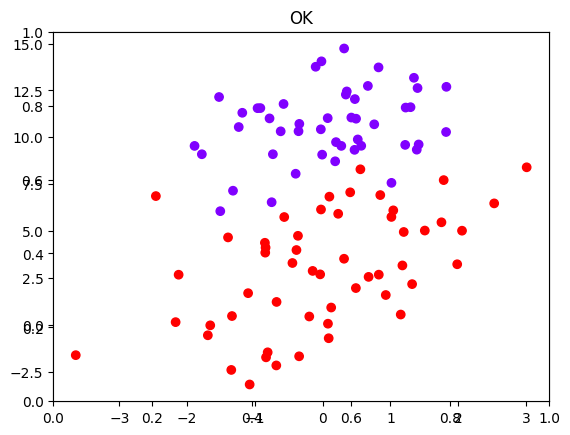

In [3]:
import matplotlib
import matplotlib.pyplot as plt
def labelsToColors(labels):
    # Crée un ensemble unique des étiquettes pour déterminer les classes
    uniqueLabels = unique(labels)
    # Génère des couleurs aléatoires pour chaque classe unique
    colors = plt.cm.rainbow(linspace(0, 1, len(uniqueLabels)))
    # Crée un dictionnaire pour mapper chaque étiquette à une couleur
    colorMap = {label: color for label, color in zip(uniqueLabels, colors)}
    # Mappe chaque étiquette dans l'ensemble original à une couleur
    return array([colorMap[label] for label in labels])

datingLabelsColors = labelsToColors(array(labelMat))
fig = plt.figure()
plt.title("OK")
ax = fig.add_subplot(111)
ax.scatter(npdataMat[:,1], npdataMat[:,2], c=datingLabelsColors)
plt.show()

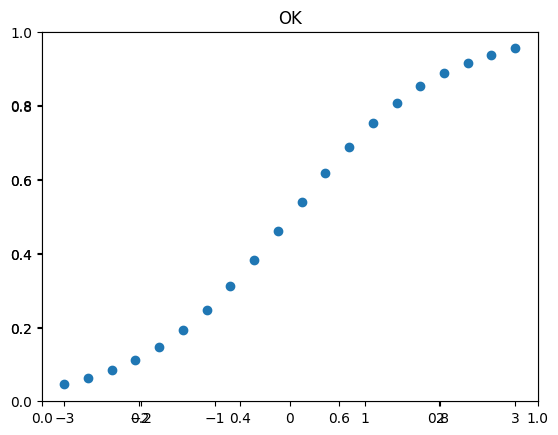

In [4]:
def sigmoid(inX):
    return 1.0/(1+exp(-inX))
result = [sigmoid(x) for x in linspace(-3, 3, 20)]
abc = [(x) for x in linspace(-3, 3, 20)]
fig = plt.figure()
plt.title("OK")
ax = fig.add_subplot(111)
ax.scatter(abc[:], result[:])
plt.show()

In [5]:
#mise à jour des poids. 
def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn) 
    labelMat = mat(classLabels).transpose() 
    m,n = dataMatrix.shape #100, 3
    alpha = 0.001
    maxCycles = 500
    weights = ones((n,1))
    for k in range(maxCycles): 
        h = sigmoid(dataMatrix*weights) 
        error = (labelMat - h) 
        weights = weights + alpha * dataMatrix.transpose() * error 
    return weights
weights = gradAscent(dataMat, labelMat)
print(weights)

[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


In [6]:
#y = (-weights[0]-weights[1]*x)/weights[2] 
y = random.rand(1, 60)
print(y.shape)
test = y.squeeze(axis=0)
print(test.shape)
stest = y.flatten()
print(stest.shape)
sstest = y[0, :]
print(sstest.shape)

(1, 60)
(60,)
(60,)
(60,)


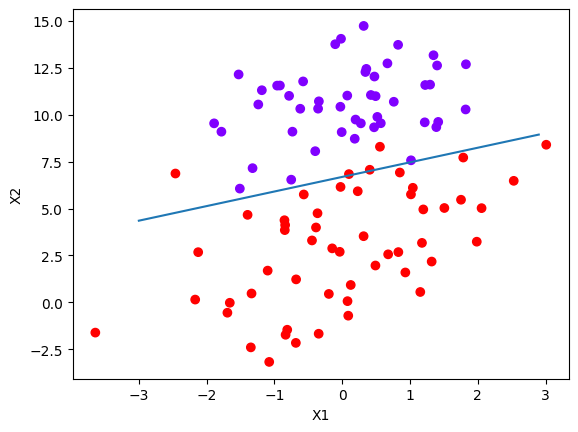

In [7]:
# Frontière de Décision
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(npdataMat[:,1], npdataMat[:,2], c=datingLabelsColors)
x = arange(-3.0, 3.0, 0.1)
arrayWeight = array(weights) #transform it in array else is still like a matrice
y = (-arrayWeight[0]-arrayWeight[1]*x)/arrayWeight[2] 
ax.plot(x,y)
plt.xlabel('X1'); plt.ylabel('X2');
plt.show() 
def plotBestFit(npdataMat, datingLabelsColors, weights):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(npdataMat[:,1], npdataMat[:,2], c=datingLabelsColors)
    x = arange(-3.0, 3.0, 0.1)
    arrayWeight = array(weights) #transform it in array else is still like a matrice
    y = (-arrayWeight[0]-arrayWeight[1]*x)/arrayWeight[2] 
    ax.plot(x,y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show() 

In [48]:
def stocGradAscent0(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n) 
    errorStack = []          #log
    for i in range(m):
        tmp = sum(dataMatrix[i]*weights)
        h = sigmoid(tmp)
        error = classLabels[i] - h
        errorStack.append(weights)
        weights = weights + alpha * error * dataMatrix[i]
    return weights, errorStack
nvweight, errors = stocGradAscent0(npdataMat, labelMat)
print(nvweight)

[ 1.01702007  0.85914348 -0.36579921]


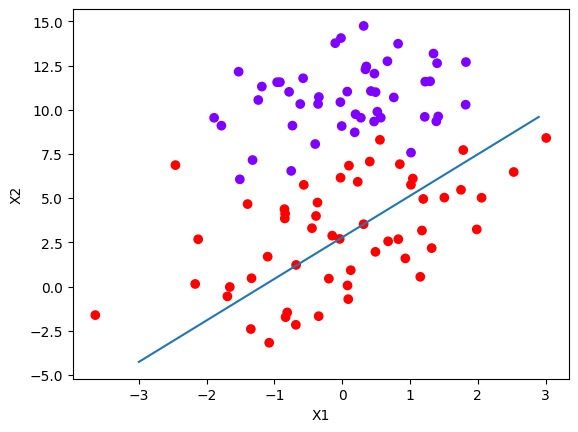

In [49]:
plotBestFit(npdataMat, datingLabelsColors, nvweight)


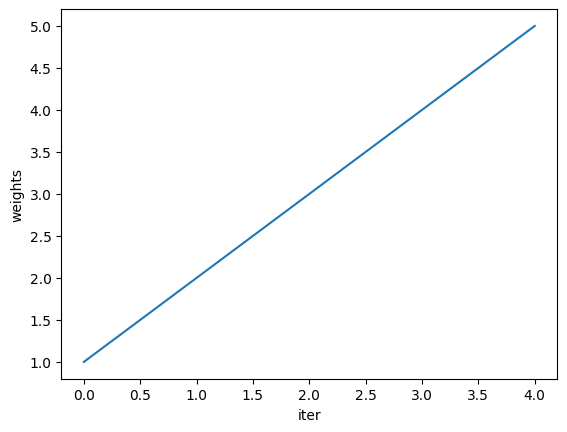

In [53]:
def plotWeight(weight, ylabel = "weights"):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    numiterations = len(weight)
    x = arange(0, numiterations, 1)
    ax.plot(x,weight)
    plt.xlabel('iter'); plt.ylabel(ylabel);
    plt.show() 
plotWeight([1, 2, 3, 4, 5])


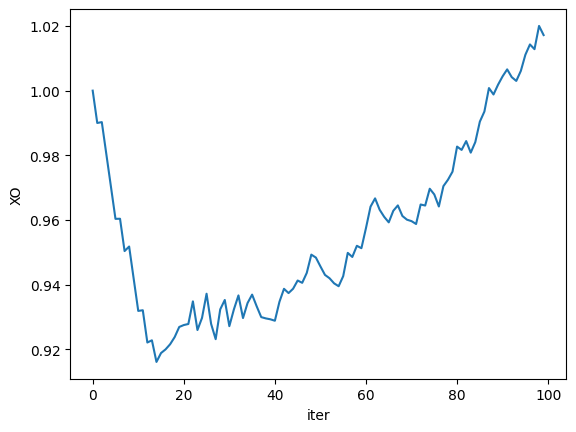

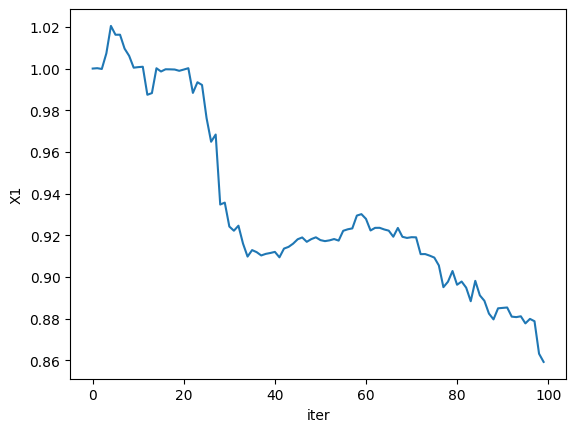

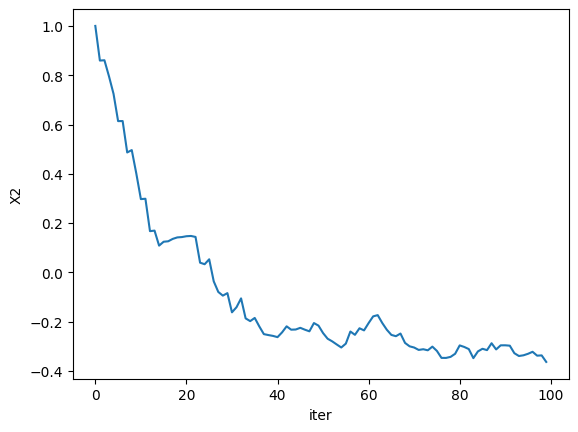

In [63]:
def plotWeights(weights, ylabel = "weights"):
    X0 = [arr[0] for arr in weights]
    X1 = [arr[1] for arr in weights]
    X2 = [arr[2] for arr in weights]
    plotWeight(X0, "XO")
    plotWeight(X1, "X1")
    plotWeight(X2, "X2")
plotWeights(errors)

In [10]:
def collect_returns(decorated_function):
    results = []  # Liste pour stocker les valeurs de retour

    def wrapper(*args, **kwargs):
        result = decorated_function(*args, **kwargs)
        results.append(result)  # Ajouter la valeur de retour à la liste
        return result

    wrapper.results = results  # Attacher la liste des résultats au wrapper pour y accéder plus tard
    return wrapper

# Utilisation du décorateur
@collect_returns
def ma_fonction(x):
    return x * 2

# Appeler la fonction décorée plusieurs fois
ma_fonction(2)
ma_fonction(4)
ma_fonction(6)

# Accéder à la liste des valeurs de retour
print(ma_fonction.results)

[4, 8, 12]


[ 6.42039135  0.66919736 -0.96121164]


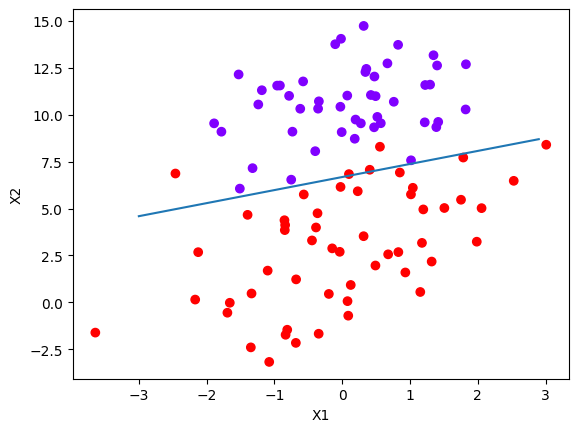

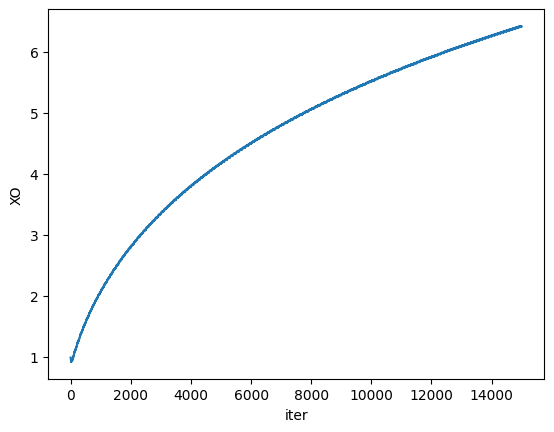

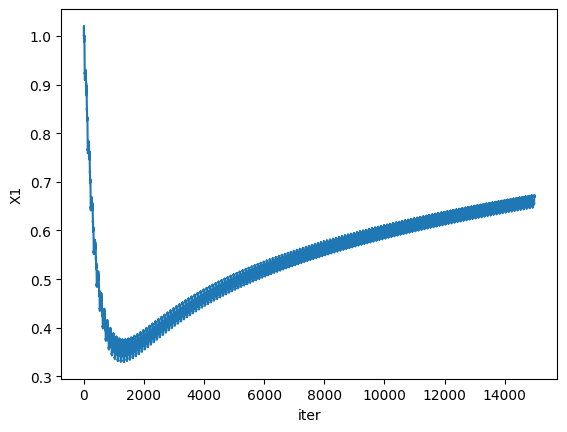

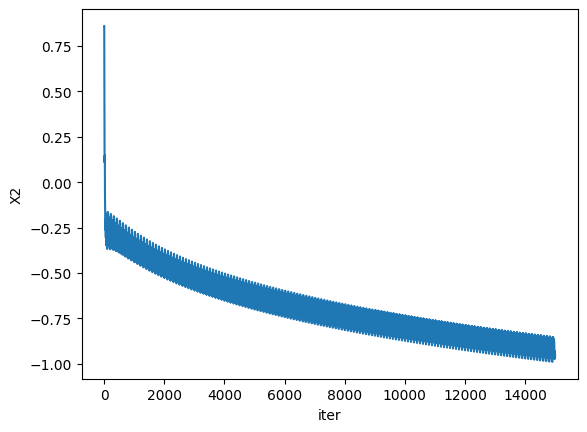

In [70]:
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
     m,n = shape(dataMatrix)
     weights = ones(n) 
     weightsStack = []
     for j in range(numIter): 
             dataIndex = list(range(m))
             for i in range(m):
                 alpha = 0.01
                 randIndex = i
                 h = sigmoid(sum(dataMatrix[randIndex]*weights))
                 error = classLabels[randIndex] - h
                 weights = weights + alpha * error * dataMatrix[randIndex]
                 weightsStack.append(weights)
     return weights, weightsStack
nvweight, weightsStack = stocGradAscent1(npdataMat, labelMat)
print(nvweight)
plotBestFit(npdataMat, datingLabelsColors, nvweight)
plotWeights(weightsStack)

[15.54740137  1.23272371 -2.18652802]


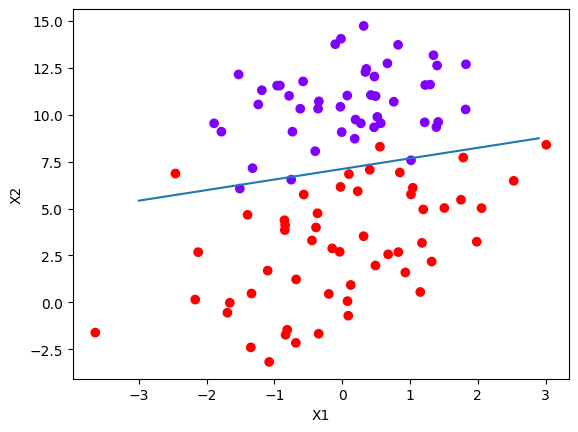

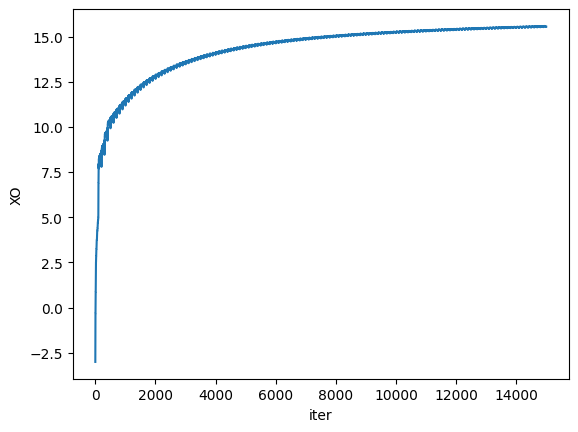

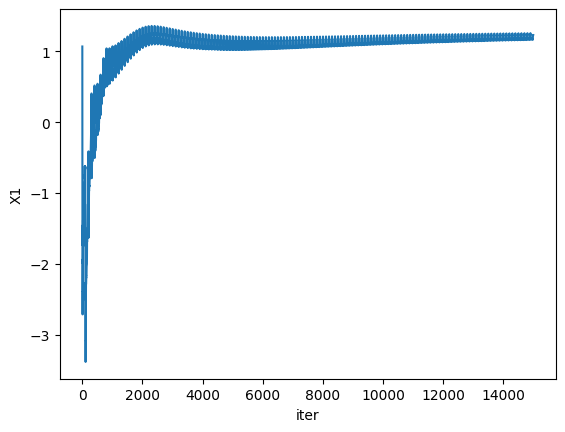

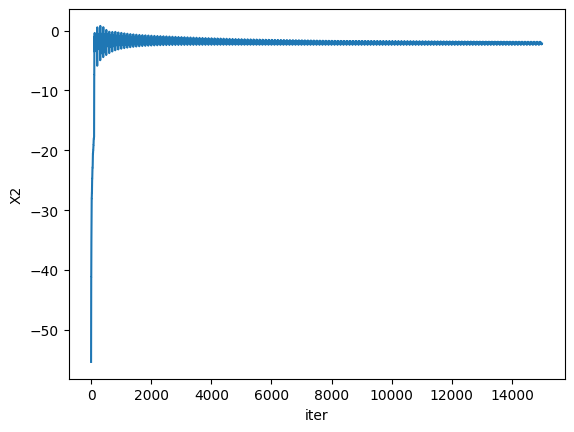

In [71]:
def stocGradAscent1_alpha(dataMatrix, classLabels, numIter=150):
     m,n = shape(dataMatrix)
     weights = ones(n) 
     weightsStack = []
     for j in range(numIter): 
             dataIndex = list(range(m))
             for i in range(m):
                 alpha = 4/(1.0+j+i)+0.01 
                 randIndex = i
                 h = sigmoid(sum(dataMatrix[randIndex]*weights))
                 error = classLabels[randIndex] - h
                 weights = weights + alpha * error * dataMatrix[randIndex]
                 weightsStack.append(weights)
     return weights, weightsStack
nvweight, weightsStack = stocGradAscent1_alpha(npdataMat, labelMat)
print(nvweight)
plotBestFit(npdataMat, datingLabelsColors, nvweight)
plotWeights(weightsStack)

[13.91833616  0.7541647  -2.01968624]


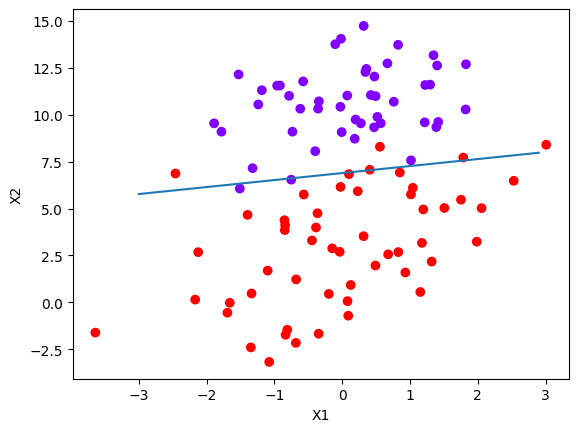

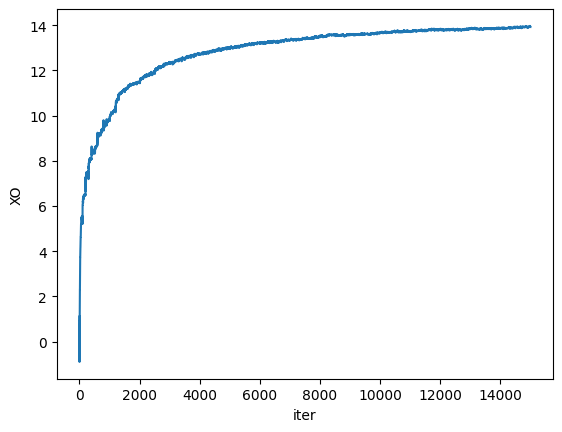

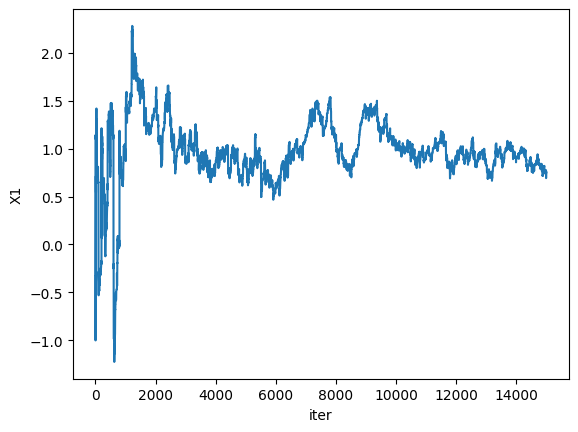

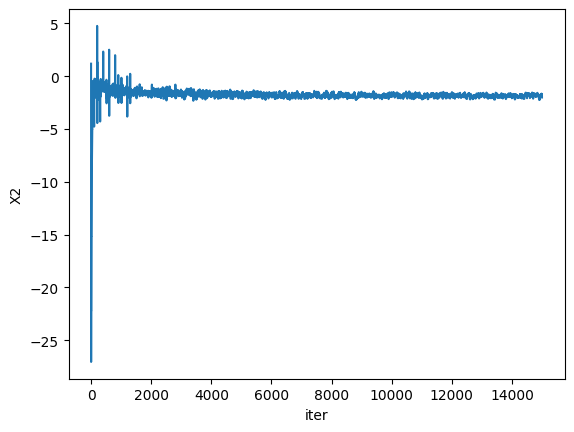

In [73]:
def stocGradAscent1_alpha_random_index(dataMatrix, classLabels, numIter=150):
     m,n = shape(dataMatrix)
     weights = ones(n) 
     weightsStack = []
     for j in range(numIter): 
             dataIndex = list(range(m))
             for i in range(m):
                 alpha = 4/(1.0+j+i)+0.01 
                 randIndex = int(random.uniform(0,len(dataIndex))) 
                 h = sigmoid(sum(dataMatrix[randIndex]*weights))
                 error = classLabels[randIndex] - h
                 weights = weights + alpha * error * dataMatrix[randIndex]
                 weightsStack.append(weights)
                 del(dataIndex[randIndex])
     return weights, weightsStack
nvweight, weightsStack = stocGradAscent1_alpha_random_index(npdataMat, labelMat)
print(nvweight)
plotBestFit(npdataMat, datingLabelsColors, nvweight)
plotWeights(weightsStack)